## Import necessary libraries and the dataset

In [1]:
# import libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.listdir("data")

['gender_submission.csv', 'test.csv', 'train.csv']

In [2]:
# Loading data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

## Data Overview and Cleaning

In [3]:
# Sample train dataset
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.2250,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


In [4]:
# Sample test dataset
test_data.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
333,1225,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19.0,1,1,2653,15.7417,NaN,C
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
203,1095,2,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,NaN,S
297,1189,3,"Samaan, Mr. Hanna",male,NaN,2,0,2662,21.6792,NaN,C
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C


In [5]:
print('The shape of the train data is (%d, %d)' % train_data.shape)
print(train_data.info())
print('*'*40)
print('The shape of the test data is (%d, %d)' % test_data.shape)
print(test_data.info())

The shape of the train data is (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
The shape of the test data is (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp    

In [6]:
passengerId = test_data.PassengerId
# drop passengerId cause it is useless
# train_data.drop(['PassengerId'], axis=1, inplace=True)
# test_data.drop(['PassengerId'], axis=1, inplace=True)

In [7]:
# Missing values
def count_missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(total / len(df) * 100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [8]:
count_missing_percentage(train_data)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [9]:
count_missing_percentage(test_data)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


### Embarked feature

In [10]:
# Embarked feature
def count_percentage(df, feature):
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna=False) / len(df) * 100, 2))
    total = pd.DataFrame(df.loc[:, feature].value_counts(dropna=False))
    percent.columns=['Percent']
    total.columns=['Total']
    return pd.concat([total, percent], axis=1)
    

In [11]:
count_percentage(train_data, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [12]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
count_percentage(test_data, 'Embarked')

,Total,Percent
S,270,64.59
C,102,24.40
Q,46,11.00


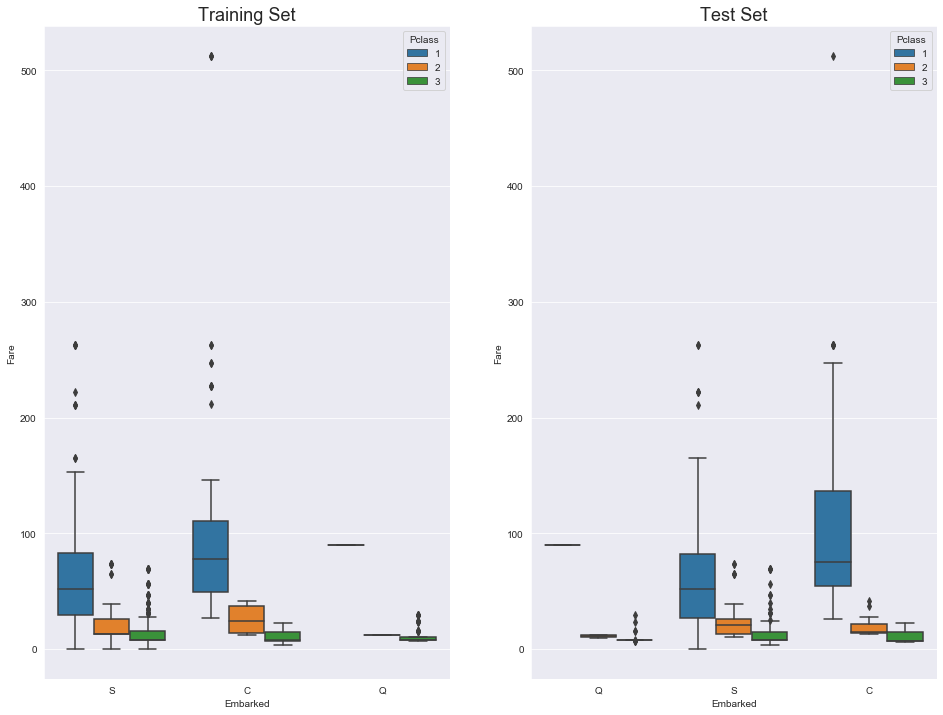

In [14]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16, 12), ncols=2)
ax1 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train_data, ax=ax[0])
ax2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=test_data, ax=ax[1])
ax1.set_title('Training Set', fontsize=18)
ax2.set_title('Test Set', fontsize=18)

# leg_1 = ax1.get_legend()
# leg_1.set_title('Pclass')
# legs = leg_1.texts
# legs[0].set_text('Upper')
# legs[1].set_text('Middle')
# legs[2].set_text('Lower')
fig.show()

In [15]:
train_data.Embarked.fillna('C', inplace=True)

### Cabin feature

In [16]:
print('Train Cabin missing: %s' % (train_data.Cabin.isnull().sum() / len(train_data.Cabin)))
print('Test Cabin missing: %s' % (test_data.Cabin.isnull().sum() / len(test_data.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [17]:
# Concat train and test data into all_data
survivers = train_data.Survived

train_data.drop(['Survived'], axis=1, inplace=True)

all_data = pd.concat([train_data, test_data], ignore_index=False)

# Assign all Null to N
all_data.Cabin.fillna('N', inplace=True)

In [18]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [19]:
count_percentage(all_data, 'Cabin')

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [20]:
all_data.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [21]:
with_N = all_data[all_data['Cabin'] == 'N']

without_N = all_data[all_data['Cabin'] != 'N']

without_N.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [22]:
def Cabin_estimator(i):
    # Grouping Cabin by its first letter
    a = 0
    if i < 16:
        a = 'G'
    elif 16 <= i < 27:
        a = 'F'
    elif 27 <= i < 38:
        a = 'T'
    elif 38 <= i < 47:
        a = 'A'
    elif 47 <= i < 53:
        a = 'E'
    elif 53 <= i < 54:
        a = 'D'
    elif 54 <= i < 116:
        a = 'C'
    else:
        a = 'B'
    return a
        

In [23]:
# Apply Cabin estimator
with_N.loc[:,'Cabin'] = with_N.Fare.apply(lambda x: Cabin_estimator(x))

all_data = pd.concat([with_N, without_N], axis=0)

# Using passengerId to seperate test and train
all_data.sort_values(by='PassengerId', inplace=True)

train_data = all_data[:891]

test_data = all_data[891:]

train_data['Survived'] = survivers

In [24]:
# The missing value of Fare
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [25]:
missing_value = test_data[(test_data.Pclass == 3) & (test_data.Sex == 'male') & (test_data.Embarked == 'S')].Fare.mean()
# Replace the null value with the mean of the fare
test_data.Fare.fillna(missing_value, inplace=True)

### Age feature

In [26]:
# For age feature, we will use Random Forest Regression later
print('Train age missing percentage: %s' % (train_data.Age.isnull().sum() / len(train_data) * 100))
print('Test age missing percentage: %s' % (test_data.Age.isnull().sum() / len(test_data) * 100))

Train age missing percentage: 19.865319865319865
Test age missing percentage: 20.574162679425836


## Data Visualizations and Feature Relations

### Gender and Survived

Text(0, 0.5, '% of passengers survived')

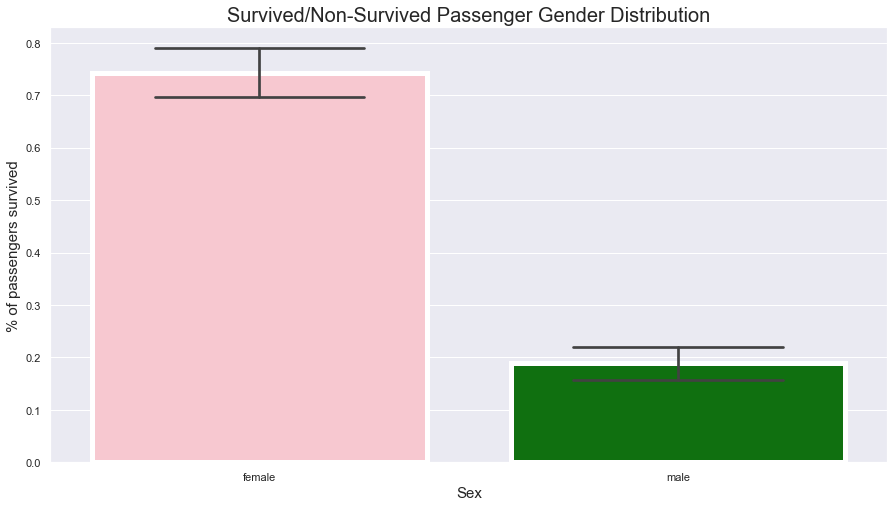

In [27]:
pal = {'male': 'green', 'female': 'pink'}
sns.set(style='darkgrid')
plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='Sex',
                 y='Survived',
                 data=train_data,
                 palette=pal,
                 linewidth=5,
                 order=['female', 'male'],
                 capsize=0.5)

plt.title('Survived/Non-Survived Passenger Gender Distribution', fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel("% of passengers survived", fontsize=15)

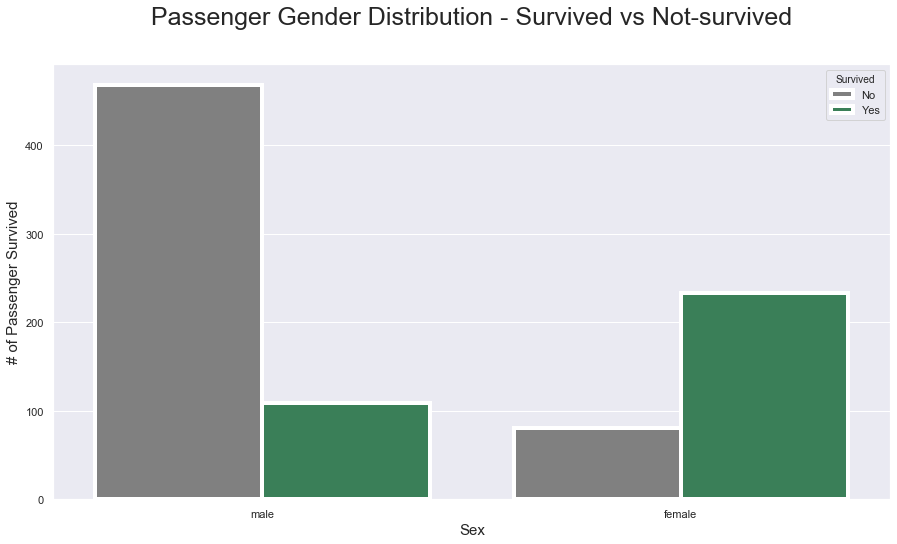

In [28]:
pal = {1: "seagreen", 0: "gray"}
sns.set(style='darkgrid')
plt.subplots(figsize=(15, 8))
ax = sns.countplot(x="Sex",
                   hue='Survived',
                   data=train_data,
                   linewidth=4,
                   palette=pal)

plt.title('Passenger Gender Distribution - Survived vs Not-survived', fontsize=25, pad=40)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('# of Passenger Survived', fontsize=15)

leg = ax.get_legend()
leg.set_title('Survived')
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

#### Summary
---
- Female passengers survived more than male
- Seems that females and children were the priority

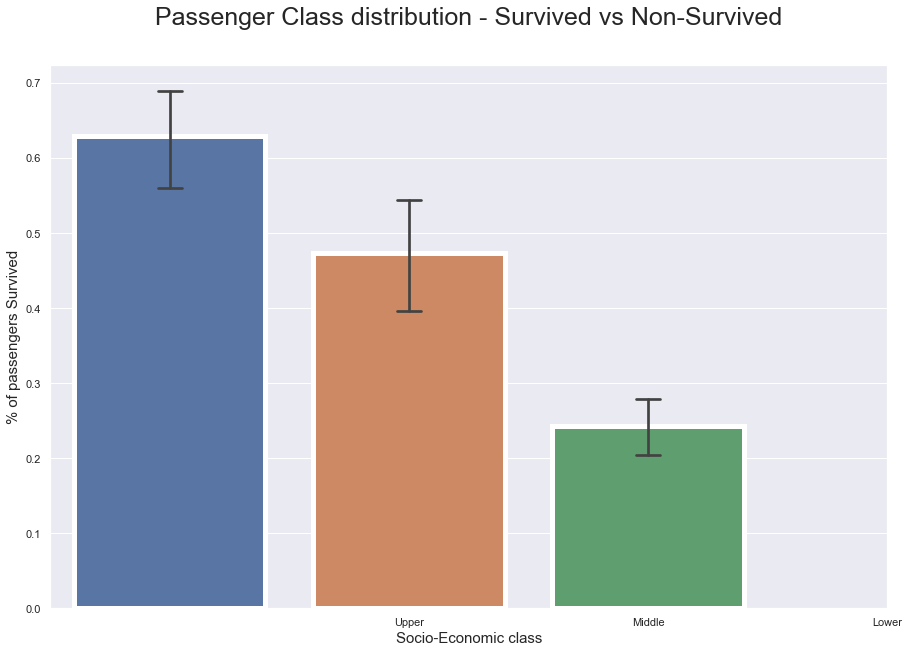

In [29]:
plt.subplots(figsize=(15, 10))
sns.barplot(x='Pclass',
            y='Survived',
            data=train_data,
            linewidth=5,
            capsize=.1)

plt.title("Passenger Class distribution - Survived vs Non-Survived", fontsize=25, pad=40)
plt.xlabel("Socio-Economic class", fontsize=15)
plt.ylabel("% of passengers Survived", fontsize=15)
labels = ['Upper', 'Middle', 'Lower']
val = sorted(train_data.Pclass.unique())
plt.xticks(val, labels)
plt.show()

* It looks like that
 - ~63% first class passengers survived
 - ~48% second class survived
 - ~24% third class survived
 

([<matplotlib.axis.XTick at 0x2210028e548>,
 <a list of 3 Text xticklabel objects>)

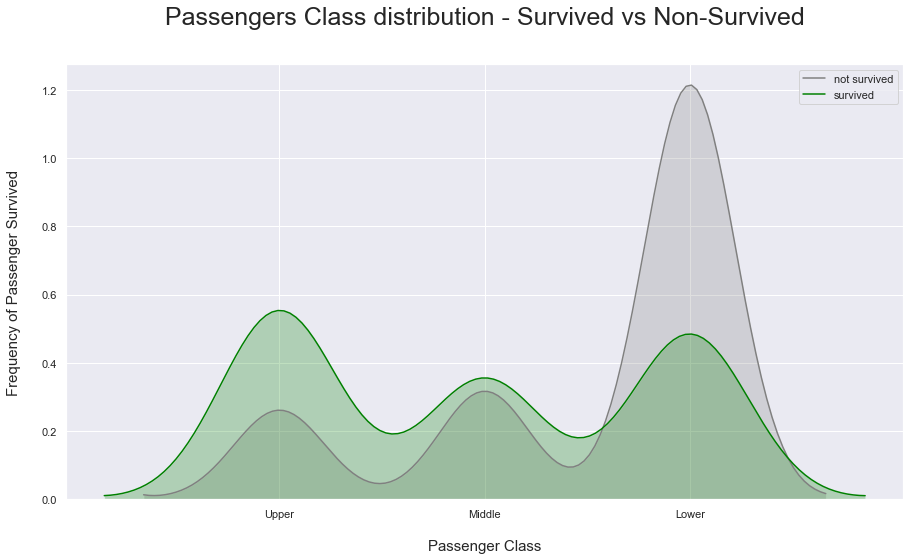

In [30]:
fig = plt.figure(figsize=(15, 8), )
ax = sns.kdeplot(train_data.Pclass[train_data.Survived == 0],
                 color='gray',
                 shade=True,
                 label='not survived')
ax = sns.kdeplot(train_data.Pclass[train_data.Survived == 1],
                 color='green',
                 shade='True',
                 label='survived')
plt.title("Passengers Class distribution - Survived vs Non-Survived", fontsize=25, pad=40)
plt.ylabel("Frequency of Passenger Survived", fontsize=15, labelpad=20)
plt.xlabel("Passenger Class", fontsize=15, labelpad=20)
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train_data.Pclass.unique()), labels)

### Fare and Survived

Text(0.5, 0, 'Fare')

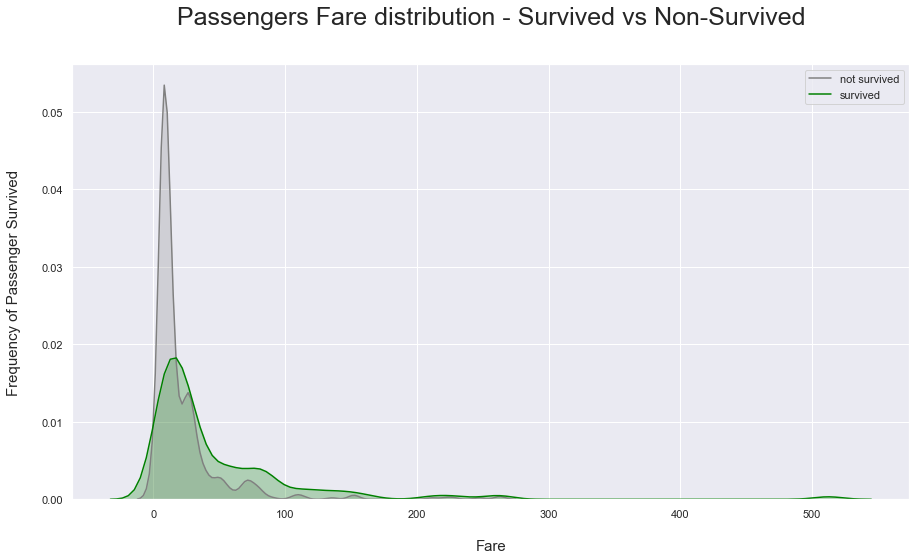

In [31]:
fig = plt.figure(figsize=(15, 8))
ax = sns.kdeplot(train_data.Fare[train_data.Survived == 0],
                 color='gray',
                 shade=True,
                 label='not survived')
ax = sns.kdeplot(train_data.Fare[train_data.Survived == 1],
                 color='green',
                 shade=True,
                 label='survived')
plt.title("Passengers Fare distribution - Survived vs Non-Survived", fontsize=25, pad=40)
plt.ylabel("Frequency of Passenger Survived", fontsize=15, labelpad=20)
plt.xlabel("Fare", fontsize=15, labelpad=20)

This plot shows something...
* Fare under 100 dollar represents that a lot of passengers who bought the ticket within that range didn't survive.
* When fare is approximately more than 280 dollar, there is no gray shade -> either everyone passed that fare point survived 
or maybe there is an outlier that clouds our judgement.

In [32]:
train_data[train_data.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


As we have assumed, there is an outlier with a fare of $512

### Age and Survived
----

Text(0, 0.5, 'Frequency')

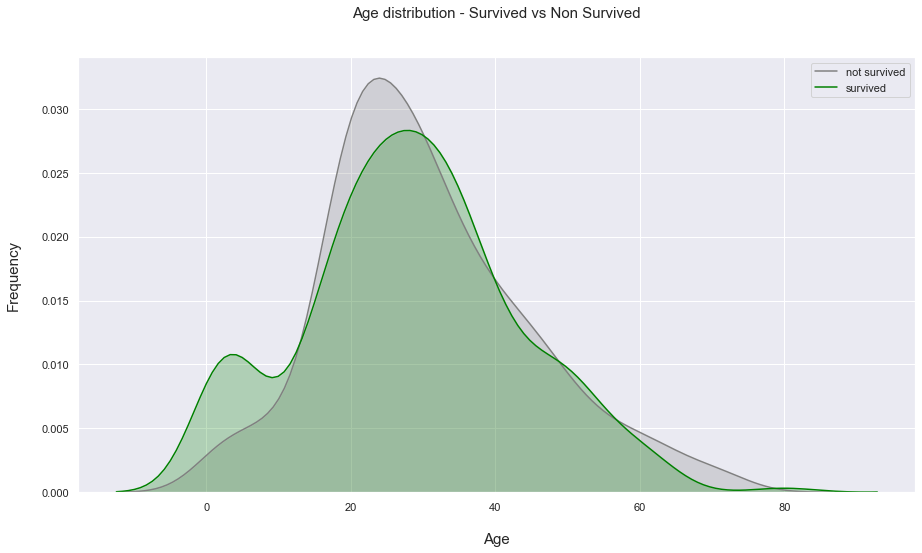

In [33]:
fig = plt.figure(figsize=(15, 8))
ax = sns.kdeplot(train_data.loc[(train_data['Survived'] == 0), 'Age'],
                 color='gray',
                 shade=True,
                 label='not survived')
ax = sns.kdeplot(train_data.loc[(train_data['Survived'] == 1), 'Age'],
                 color='green',
                 shade=True,
                 label='survived')
plt.title('Age distribution - Survived vs Non Survived', fontsize=15, pad=40)
plt.xlabel("Age", fontsize=15, labelpad=20)
plt.ylabel("Frequency", fontsize=15, labelpad=20)

### Combined Feature Relations
---

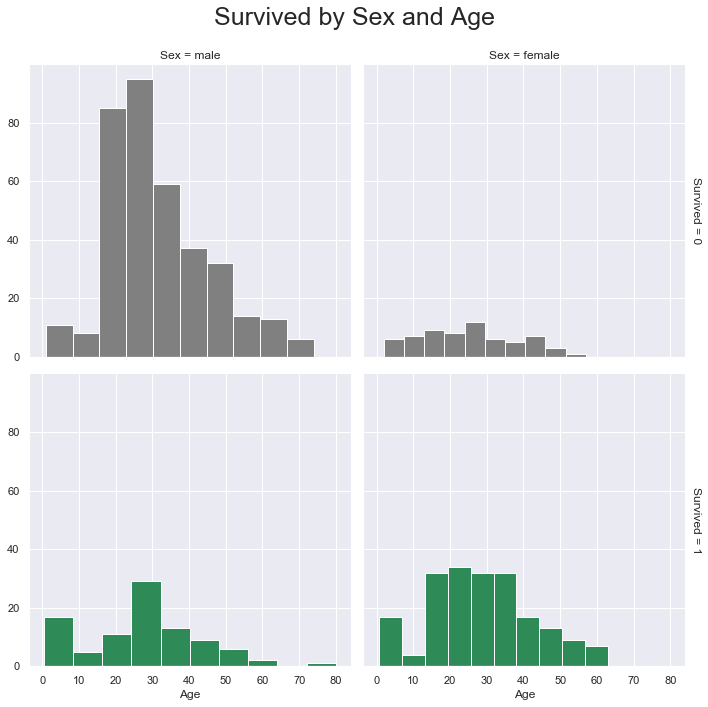

In [34]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train_data, size=5, col="Sex", row="Survived", margin_titles=True, hue="Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor='white')
g.fig.suptitle("Survived by Sex and Age", size=25)
plt.subplots_adjust(top=0.9)

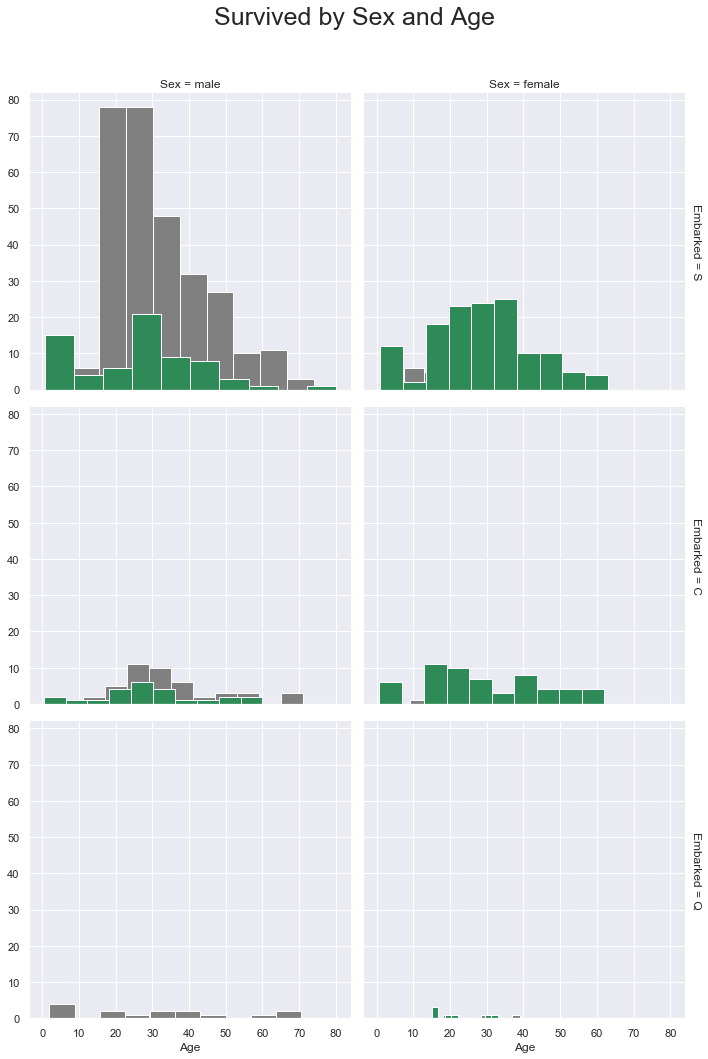

In [35]:
g = sns.FacetGrid(train_data, size=5, col="Sex", row="Embarked", margin_titles=True, hue="Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor='white')
g.fig.suptitle("Survived by Sex and Age", size=25)
plt.subplots_adjust(top=0.9)

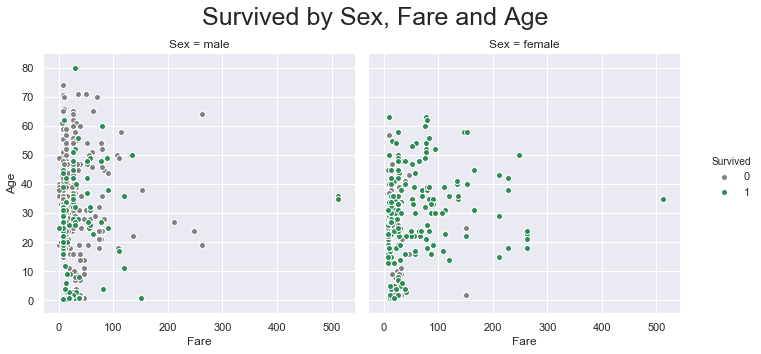

In [36]:
g = sns.FacetGrid(train_data, size=5, col='Sex', hue='Survived', margin_titles=True,
                  palette=pal)
g.map(plt.scatter, "Fare", "Age", edgecolor='w').add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size=25)
plt.subplots_adjust(top=0.85)

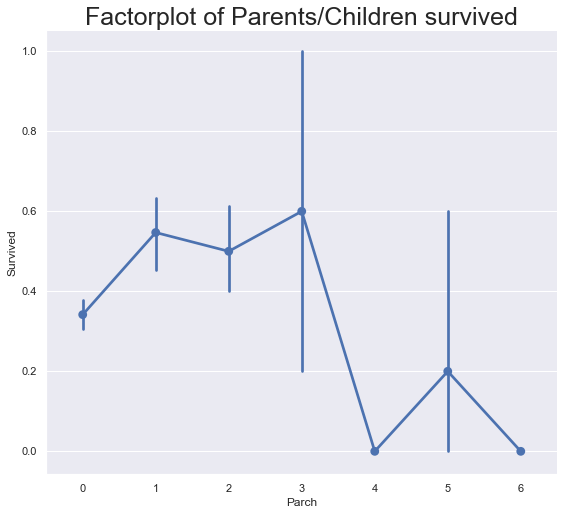

In [37]:
# dropping the three outliers where Fare is over $500
train_data = train_data[train_data.Fare < 500]
# factor plot
sns.factorplot(x='Parch', y='Survived', data=train_data, kind='point', size=8)
plt.title("Factorplot of Parents/Children survived", fontsize=25)
plt.subplots_adjust(top=0.85)

**Passengers who traveled win big groups with parents/children had less survival rate than other passengers**

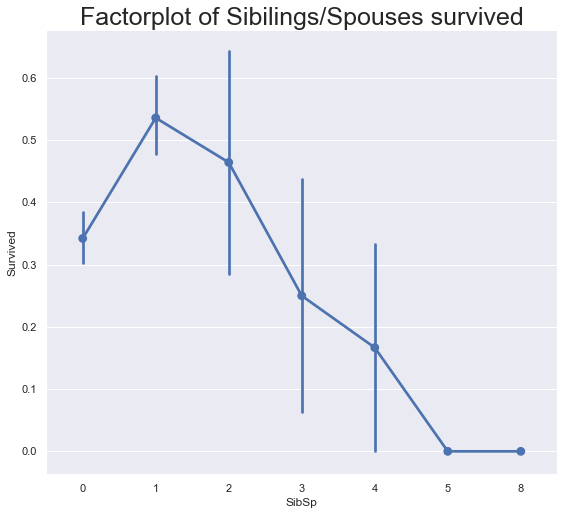

In [38]:
sns.factorplot(x='SibSp', y='Survived', data=train_data, kind='point', size=8)
plt.title("Factorplot of Sibilings/Spouses survived", fontsize=25)
plt.subplots_adjust(top=0.85)

**Passengers who traveled in small groups with siblings/spouses had better chances of survival

In [39]:
# Replacing female with 0 and male with 1 in "Sex" column
train_data['Sex'] = train_data.Sex.apply(lambda x: 0 if x == "female" else 1)
test_data['Sex'] = test_data.Sex.apply(lambda x: 0 if x == "female" else 1)

## Statistical Overview
---

In [40]:
train_data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [41]:
train_data.describe(include = ['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Ryerson, Miss. Emily Borie",1601,G,S
freq,1,7,464,644


In [42]:
train_data[['Pclass', 'Survived']].groupby('Pclass').mean().reset_index()

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [43]:
# Overview(Survived vs non survived)
survived_summary = train_data.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [44]:
survived_summary = train_data.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [45]:
survived_summary = train_data.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


* This data has 888 row and 9 columns
* only 38% passengers survived
* 74% female survived while 19% male survived
* 62% first class passengers survived while only 24% lower class paseengers survived

### Correlation Matrix and Heatup
---
#### Correlations

In [46]:
pd.DataFrame(abs(train_data.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


*Sex is the most important correlated feature with Survived(dependent variable) followed by Pclass*

In [47]:
# get the most important variables
corr = train_data.corr() ** 2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

** Squaring the correlation feature note only gives on positive correlations but also simplifies the relationships.**

Text(0.5, 1.03, 'Correlations Among Features')

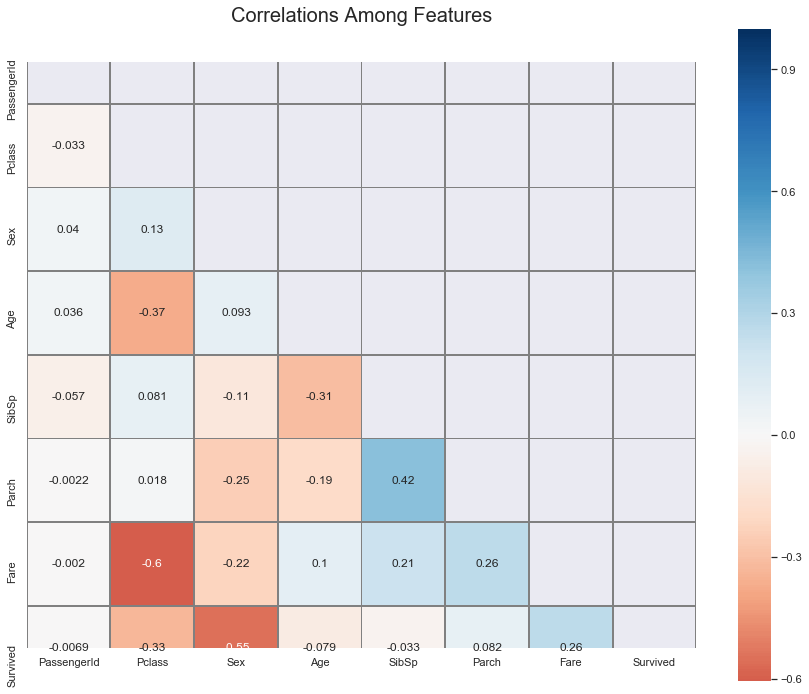

In [48]:
# heatmap to see the correlation between features
# generate a mask for the upper traiangle (taken from seaborn example gallery)
mask = np.zeros_like(train_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(15, 12))
sns.heatmap(train_data.corr(),
            annot=True,
            mask=mask,
            cmap='RdBu',
            linewidths=.9,
            linecolor='gray',
            fmt='.2g',
            center=0,
            square=True)
plt.title("Correlations Among Features", y=1.03, fontsize=20, pad=40)

**Positive Correlation Features:
* Fare and Survived: 0.26

** Negative Correlation Features:
* Fare and Pclass: -0.6
* Sex and Survived: -0.55
* Pclass and Survived: -0.33

### Statistical Test for Correlation
---
#### Hypothesis testing for Titanic

In [49]:
male_mean = train_data[train_data['Sex'] == 1].Survived.mean()
male_mean

0.18608695652173912

In [50]:
male_mean = train_data[train_data['Sex'] == 1].Survived.mean()

female_mean = train_data[train_data['Sex'] == 0].Survived.mean()
print("Male survival mean: %s" % male_mean)
print("Female survival mean: %s" % female_mean)
print('The mean difference between male and female survival rate: %s' % (male_mean-female_mean))

Male survival mean: 0.18608695652173912
Female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: -0.5551271009862481


In [51]:
# Sperate male and female dataframe
male = train_data[train_data['Sex'] == 1]
female = train_data[train_data['Sex'] == 0]

# empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']), 50, )))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']), 50, )))
    
# Print
print('Male mean sample mean: %s' % round(np.mean(m_mean_samples), 2))
print('Female mean sample mean: %s' % round(np.mean(f_mean_samples), 2))
print('Difference between male and female mean sample mean: %s' % round(np.mean(m_mean_samples) - np.mean(f_mean_samples), 2))


Male mean sample mean: 0.19
Female mean sample mean: 0.72
Difference between male and female mean sample mean: -0.53


In [52]:
import scipy.stats as stats

print(stats.ttest_ind(m_mean_samples, f_mean_samples))
print('This is the p-value when we break it into standard form: %s' % stats.ttest_ind(m_mean_samples, f_mean_samples).pvalue)

Ttest_indResult(statistic=-47.87683579598326, pvalue=8.729732347421686e-70)
This is the p-value when we break it into standard form: 8.729732347421686e-70


## Feature Engineering
---
### name_length
**Create a new feature "name_length" that will take the count of letters of each name**

In [53]:
# Creating a new column
train_data['name_length'] = [len(i) for i in train_data.Name]
test_data['name_length'] = [len(i) for i in test_data.Name]

def name_length_group(size):
    a = ''
    if size <= 20:
        a = 'short'
    elif size <= 35:
        a = 'medium'
    elif size <= 45:
        a = 'good'
    else:
        a = 'long'
    return a

train_data['nLength_group'] = train_data['name_length'].map(name_length_group)
test_data['nLength_group'] = test_data['name_length'].map(name_length_group)

# cuts the column by given bins based on the range of name_length
# group_names = ['short', 'medium', 'good', 'long']
# train_data['name_len_group'] = pd.cut(train_data['name_length'], bins=4, labels=group_names)

### title
**getting the title of each name as a new feature**

In [54]:
# get the title from the name
train_data['title'] = [i.split('.')[0] for i in train_data.Name]
train_data['title'] = [i.split(',')[1] for i in train_data.title]
test_data['title'] = [i.split('.')[0] for i in test_data.Name]
test_data['title'] = [i.split(',')[1] for i in test_data.title]

In [55]:
train_data['title'] = [i.replace('Ms', 'Miss') for i in train_data.title]
train_data['title'] = [i.replace('Mlle', 'Miss') for i in train_data.title]
train_data['title'] = [i.replace('Mme', 'Mrs') for i in train_data.title]
train_data['title'] = [i.replace('Dr', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Col', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Major', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Don', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Jonkheer', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Sir', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Lady', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Capt', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('the Countess', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Rev', 'rare') for i in train_data.title]

test_data['title'] = [i.replace('Ms', 'Miss') for i in test_data.title]
test_data['title'] = [i.replace('Dr', 'rare') for i in test_data.title]
test_data['title'] = [i.replace('Col', 'rare') for i in test_data.title]
test_data['title'] = [i.replace('Dona', 'rare') for i in test_data.title]
test_data['title'] = [i.replace('Rev', 'rare') for i in test_data.title]


### family_size
**Creating a new feature named "family_size"**

In [56]:
train_data['family_size'] = train_data.SibSp + train_data.Parch + 1
test_data['family_size'] = test_data.SibSp + test_data.Parch + 1

In [57]:
def family_group(size):
    a = ''
    if size <= 1:
        a = 'loner'
    elif size <= 4:
        a = 'small'
    else:
        a = 'large'
    return a

In [58]:
train_data['family_group'] = train_data['family_size'].map(family_group)
test_data['family_group'] = test_data['family_size'].map(family_group)

### is_alone

In [59]:
train_data['is_alone'] = [1 if i<2 else 0 for i in train_data.family_size]
test_data['is_alone'] = [1 if i<2 else 0 for i in test_data.family_size]

### ticket

In [60]:
train_data.drop(['Ticket'], axis=1, inplace=True)
test_data.drop(['Ticket'], axis=1, inplace=True)

### calculated_fare
**Seems that the fair column kept a record of the total fare**

In [61]:
train_data['calculated_fare'] = train_data.Fare / train_data.family_size
test_data['calculated_fare'] = test_data.Fare / test_data.family_size

### fare_group

In [62]:
def fare_group(fare):
    a = ''
    if fare <= 4:
        a = 'very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = 'very_high'
    return a

train_data['fare_group'] = train_data['calculated_fare'].map(fare_group)
test_data['fare_group'] = test_data['calculated_fare'].map(fare_group)
 
# groups = ['very_low', 'mid', 'high', 'very_high']
# train_data['fare_group'] = pd.cut(train_data['calculated_fare'], bins=4, labels=groups)

### PassengerId

In [63]:
train_data.drop(['PassengerId'], axis=1, inplace=True)
test_data.drop(['PassengerId'], axis=1, inplace=True)

### Creating dummy variables

In [64]:
train_data = pd.get_dummies(train_data, columns=['title', 'Pclass', 'Cabin', 'Embarked', 'nLength_group', 'family_group', 'fare_group'])
test_data = pd.get_dummies(test_data, columns=['title', 'Pclass', 'Cabin', 'Embarked', 'nLength_group', 'family_group', 'fare_group'])
train_data.drop(['family_size', 'Name', 'Fare', 'name_length'], axis=1, inplace=True)
test_data.drop(['Name', 'family_size', 'Fare', 'name_length'], axis=1, inplace=True)

### age

In [65]:
train_data = pd.concat([train_data[['Survived', 'Age', 'Sex', 'SibSp', 'Parch']], train_data.loc[:, 'is_alone':]], axis=1)
test_data = pd.concat([test_data[['Age', 'Sex']], test_data.loc[:, 'SibSp':]], axis=1)

In [66]:
from sklearn.ensemble import RandomForestRegressor

def completing_age(df):
    age_df = df.loc[:, 'Age':]
    
    temp_train = age_df.loc[age_df.Age.notnull()]
    temp_test = age_df.loc[age_df.Age.isnull()]
    
    y = temp_train.Age.values
    x = temp_train.loc[:, 'Sex':]. values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, 'Sex':])
    
    df.loc[df.Age.isnull(), 'Age'] = predicted_age
    
    return df

completing_age(train_data)
completing_age(test_data)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,fare_group_very_low
0,34.500000,1,0,0,1,7.829200,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1,47.000000,0,1,0,0,3.500000,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,62.000000,1,0,0,1,9.687500,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
3,27.000000,1,0,0,1,8.662500,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,22.000000,0,1,1,0,4.095833,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,23.230227,1,0,0,1,8.050000,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
414,39.000000,0,0,0,1,108.900000,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
415,38.500000,1,0,0,1,7.250000,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
416,23.230227,1,0,0,1,8.050000,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


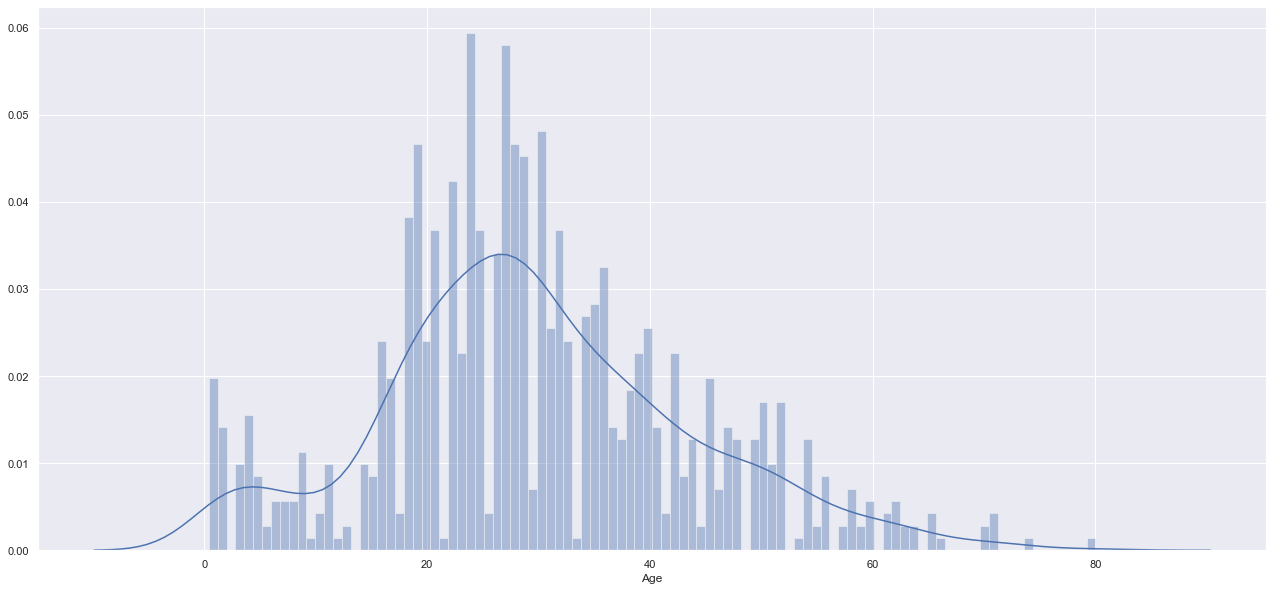

In [67]:
plt.subplots(figsize=(22, 10))
sns.distplot(train_data.Age, bins=100, kde=True, rug=False, norm_hist=False)

### age_group

In [68]:
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4:
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

train_data['age_group'] = train_data['Age'].map(age_group_fun)
test_data['age_group'] = test_data['Age'].map(age_group_fun)

train_data = pd.get_dummies(train_data, columns=['age_group'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['age_group'], drop_first=True)

## Pre-Modeling Tasks
### Separating dependent and independent variables

In [69]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

### Splitting the training data

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

### Feature Scaling

In [71]:
train_data.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,...,fare_group_mid,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
850,0,4.000000,1,4,2,0,4.467857,1,0,0,...,0,0,0,0,0,0,0,0,0,1
867,0,31.000000,1,0,0,1,50.495800,0,0,1,...,0,1,0,0,0,0,0,0,0,0
832,0,26.765652,1,0,0,1,7.229200,0,0,1,...,0,0,0,0,0,0,0,0,0,0
505,0,18.000000,1,1,0,0,54.450000,0,0,1,...,0,1,0,0,0,0,0,0,1,0
673,1,31.000000,1,0,0,1,13.000000,0,0,1,...,1,0,0,0,0,0,0,0,0,0


**Before Scaling**

In [72]:
headers = X_train.columns

X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.5000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
187,45.000000,1,0,0,1,26.5500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
849,41.775333,0,1,0,0,44.5521,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
433,17.000000,1,0,0,1,7.1250,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
651,18.000000,0,0,1,0,11.5000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [73]:
test_data.sample(5)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
173,22.210754,1,0,0,1,7.2292,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
48,60.000000,0,0,0,1,76.2917,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
388,21.000000,1,0,0,1,7.7500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
253,24.000000,1,0,0,1,9.3250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
153,36.000000,0,0,2,0,4.0611,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

test_data = sc.transform(test_data)

**After Scaling**

In [75]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.254717,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,5.099020,-0.286299,-0.200699
1,1.114501,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.200699
2,0.884700,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,...,-0.455321,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.200699
3,-0.880878,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.200699
4,-0.809614,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,...,2.196253,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.200699


## Modeling the Data
---
### Logistic Regression

In [76]:
train_data.calculated_fare = train_data.calculated_fare.astype(float)

Text(0, 0.5, 'Survival Status')

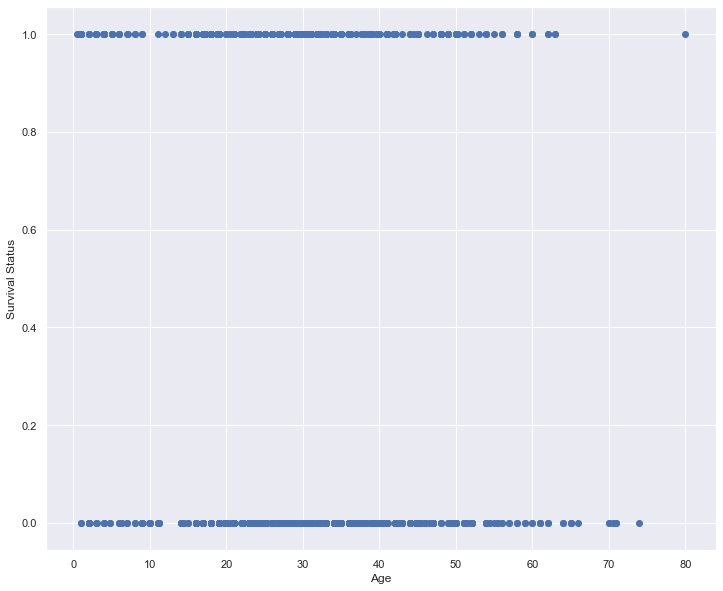

In [77]:
plt.subplots(figsize=(12, 10))
plt.scatter(train_data.Age, train_data.Survived)
plt.xlabel('Age')
plt.ylabel('Survival Status')

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy score is: %s' % round(accuracy_score(y_pred, y_test), 4))

Accuracy score is: 0.8061


Confusion matrix, without normalization
[[150  27]
 [ 30  87]]
Confusion matrix, without normalization
[[150  27]
 [ 30  87]]


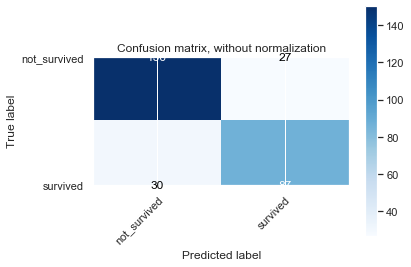

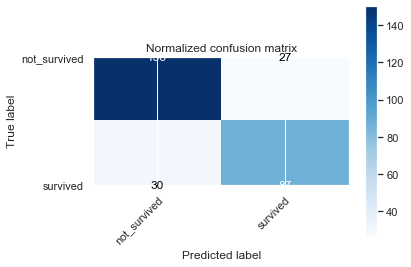

In [79]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            
    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Nomalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
             rotation_mode='anchor')
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)
class_names = np.array(['not_survived', 'survived'])

plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Normalized confusion matrix')

plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       177
           1       0.76      0.74      0.75       117

    accuracy                           0.81       294
   macro avg       0.80      0.80      0.80       294
weighted avg       0.81      0.81      0.81       294



### AUC&ROC Curve

0.8365444975614467


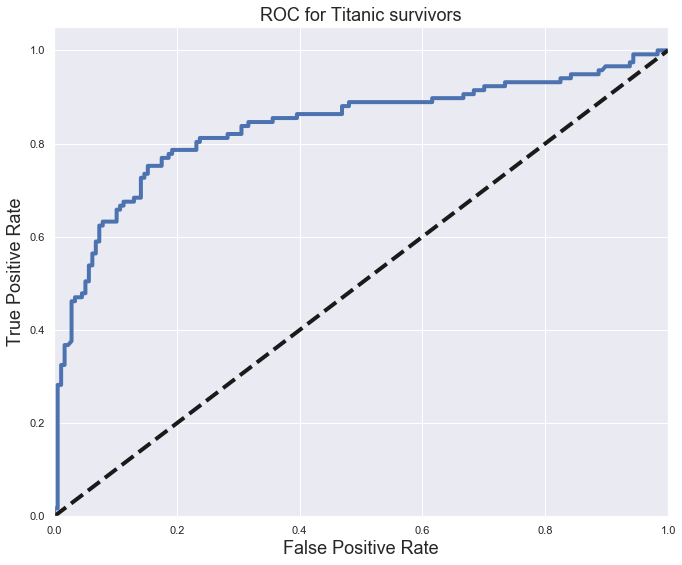

In [81]:
from sklearn.metrics import roc_curve, auc

y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print(ROC_AUC)

plt.figure(figsize=(11, 9))
plt.plot(FPR, TPR, label='ROC curve(area=%0.2f)'%ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Titanic survivors', fontsize=18)
plt.show()

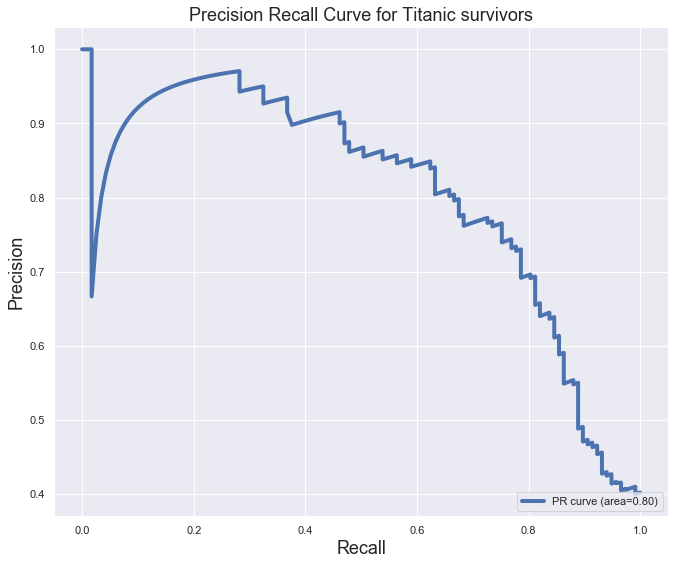

In [82]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=(11, 9))
plt.plot(recall, precision, label='PR curve (area=%-.2f)'%PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc='lower right')
plt.show()

### Using Cross-validation:

In [83]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=0)

column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=cv)
print('Cross-Validation accuracy scores: %s' % accuracies)
print('Mean Cross-Validation accuracy score: %s' % round(accuracies.mean(), 5))

Cross-Validation accuracy scores: [0.83 0.85 0.82 0.83 0.83 0.82 0.8  0.85 0.82 0.82]
Mean Cross-Validation accuracy score: 0.82793


### Grid Search on Logistic Regression

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
penalties = ['l1', 'l2']
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25)

param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator=LogisticRegression(),
                   param_grid=param,
                   scoring='accuracy',
                   n_jobs=-1,
                   cv=cv)

grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['

In [85]:
# Getting the best of everything
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8198198198198199
{'C': 0.2, 'penalty': 'l2'}
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [86]:
# Using the best parameters
logreg_grid = grid.best_estimator_
logreg_grid.score(X, y)

0.8400900900900901

In [87]:
# Using the best parameters
logreg_grid = grid.best_estimator_
logreg_grid.score(X, y)

0.8400900900900901

### KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='minkowski', p=2)

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
print('Cross-Validation accuracy score: %s' % accuracies)
print('Mean Cross-Validation accuracy score: %s' % round(accuracies.mean(), 3))

Cross-Validation accuracy score: [0.81 0.82 0.77 0.81 0.81 0.81 0.79 0.79 0.77 0.83]
Mean Cross-Validation accuracy score: 0.8


In [89]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())
    
print('Accuracy scores are: %s' % k_scores)
print('Mean Accuracy score: %s' % np.mean(k_scores))

Accuracy scores are: [0.7531531531531531, 0.7756756756756757, 0.7936936936936936, 0.7887387387387388, 0.8, 0.7995495495495495, 0.7977477477477477, 0.790990990990991, 0.799099099099099, 0.7914414414414414, 0.7981981981981983, 0.79009009009009, 0.7972972972972974, 0.786936936936937, 0.7950450450450449, 0.7828828828828829, 0.7896396396396397, 0.7810810810810811, 0.7833333333333334, 0.7761261261261261, 0.7801801801801801, 0.773873873873874, 0.7761261261261263, 0.7711711711711711, 0.773873873873874, 0.7617117117117116, 0.7644144144144145, 0.7599099099099098, 0.7617117117117117, 0.7572072072072072]
Mean Accuracy score: 0.7816966966966968


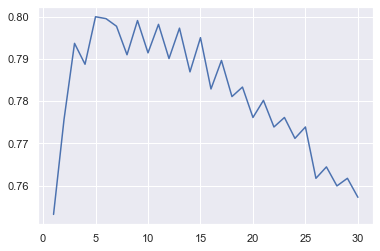

In [90]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

### Grid search on KNN classifier

In [91]:
from sklearn.model_selection import GridSearchCV

k_range = range(1, 31)

weights_options = ['uniform', 'distance']

param = {'n_neighbors': k_range, 'weights': weights_options}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=15)

grid = GridSearchCV(KNeighborsClassifier(), param, cv=cv, verbose=False, n_jobs=-1)

grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [92]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8022522522522522
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [93]:
knn_grid = grid.best_estimator_
knn_grid.score(X, y)

0.8671171171171171

#### Using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

k_range = range(1, 31)

weights_options = ['uniform', 'distance']

param = {'n_neighbors': k_range, 'weights': weights_options}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)

grid = RandomizedSearchCV(KNeighborsClassifier(), param, cv=cv, verbose=False, n_jobs=-1, n_iter=40)

grid.fit(X, y)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X, y)

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10] ## penalty parameter C for the error term
gammas = [0.0001, 0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma': gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=cv) # 'rbf' stands for gaussian kernel
grid_search.fit(X, y)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

In [ ]:
svm_grid = grid_search.best_estimator_
svm_grid.score(X, y)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1, 30)
max_feature = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 'auto']
criterion = ['entropy', 'gini']

param = {'max_depth': max_depth,
         'max_features': max_feature,
         'criterion': criterion}

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=param,
                    verbose=False,
                    cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                    n_jobs=-1)

grid.fit(X, y)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
dectree_grid = grid.best_estimator_
dectree_grid.score(X, y)

In [ ]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

dot_data = StringIO()
export_graphviz(dectree_grid, out_file=dot_data,
                feature_names=column_names, class_names=(['Survived' if int(i) is 1 else 'Not_survived' for i in y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [ ]:
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index=column_names,
                                   columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

### Random Forest Classifier

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=False)

In [95]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7958801498127341
{'weights': 'uniform', 'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [96]:
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X, y)

0.8671171171171171

### Gaussian Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.789


### Support Vector Machines

In [98]:
from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10] ## penalty parameter C for the error term
gammas = [0.0001, 0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma': gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=cv) # 'rbf' stands for gaussian kernel
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [99]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.844943820224719
{'C': 2, 'gamma': 0.001}
SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [100]:
svm_grid = grid_search.best_estimator_
svm_grid.score(X, y)

0.8265765765765766

### Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1, 30)
max_feature = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 'auto']
criterion = ['entropy', 'gini']

param = {'max_depth': max_depth,
         'max_features': max_feature,
         'criterion': criterion}

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=param,
                    verbose=False,
                    cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                    n_jobs=-1)

grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
         

In [102]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8312878787878788
{'criterion': 'gini', 'max_depth': 5, 'max_features': 22}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=22, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [103]:
dectree_grid = grid.best_estimator_
dectree_grid.score(X, y)

0.8490990990990991

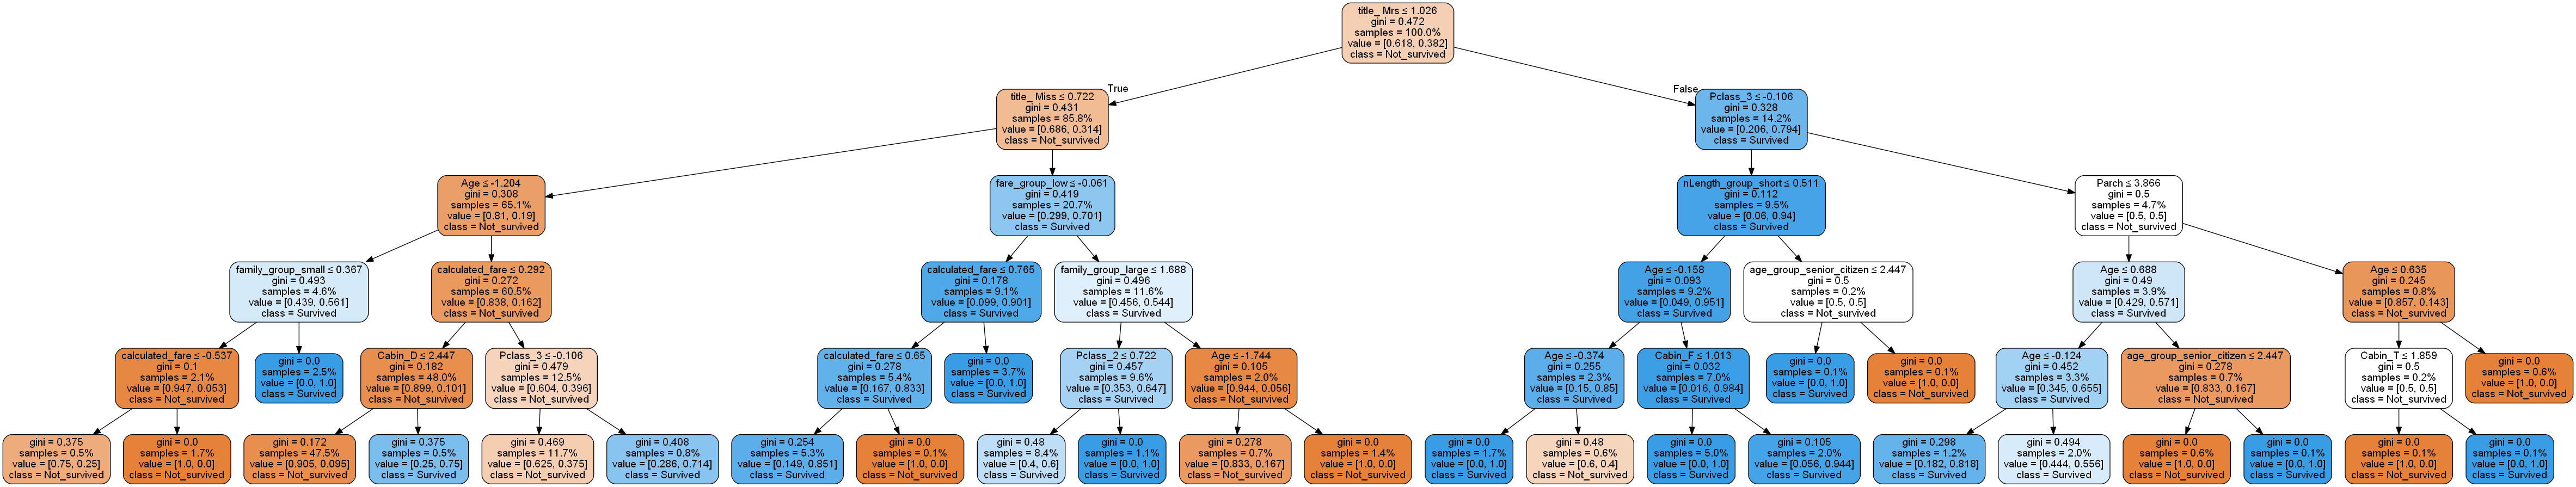

In [104]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

dot_data = StringIO()
export_graphviz(dectree_grid, out_file=dot_data,
                feature_names=column_names, class_names=(['Survived' if int(i) is 1 else 'Not_survived' for i in y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [105]:
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index=column_names,
                                   columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_ Miss,0.322074
title_ Mrs,0.220346
Age,0.086768
family_group_small,0.080935
calculated_fare,0.080815
Pclass_3,0.054730
fare_group_low,0.051271
family_group_large,0.045970
Cabin_D,0.015046
Pclass_2,0.012487


### Random Forest Classifier